Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

/mydrive


In [4]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/yolov8"

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/yolov8’: File exists


In [5]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


1. Predict


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zgVkYm9foqZlPZLg7cfb")
project = rf.workspace("finalds-v5pqd").project("ds-alnd7")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 705.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.11, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to ds-1 in yolov8:: 100%|██████████| 3185/3185 [00:00<00:00, 8222.89it/s]


In [7]:
path = '/content/drive/MyDrive/Colab Notebooks/yolov8'

Importing data to Drive

In [8]:
import shutil
import os
os.makedirs(path, exist_ok=True)

# Move the entire folder to the destination
source_folder = "/content/ds-1"
shutil.move(source_folder, path)

'/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1'

In [10]:
path="/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1"
!yolo task=detect mode=train model="$path/yolov8m.pt" data="$path/data.yaml" epochs=200 project="$path/runs"

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/yolov8m.pt, data=/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/data.yaml, epochs=200, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

Evaluate Custom YOLOv8 Detector Performance

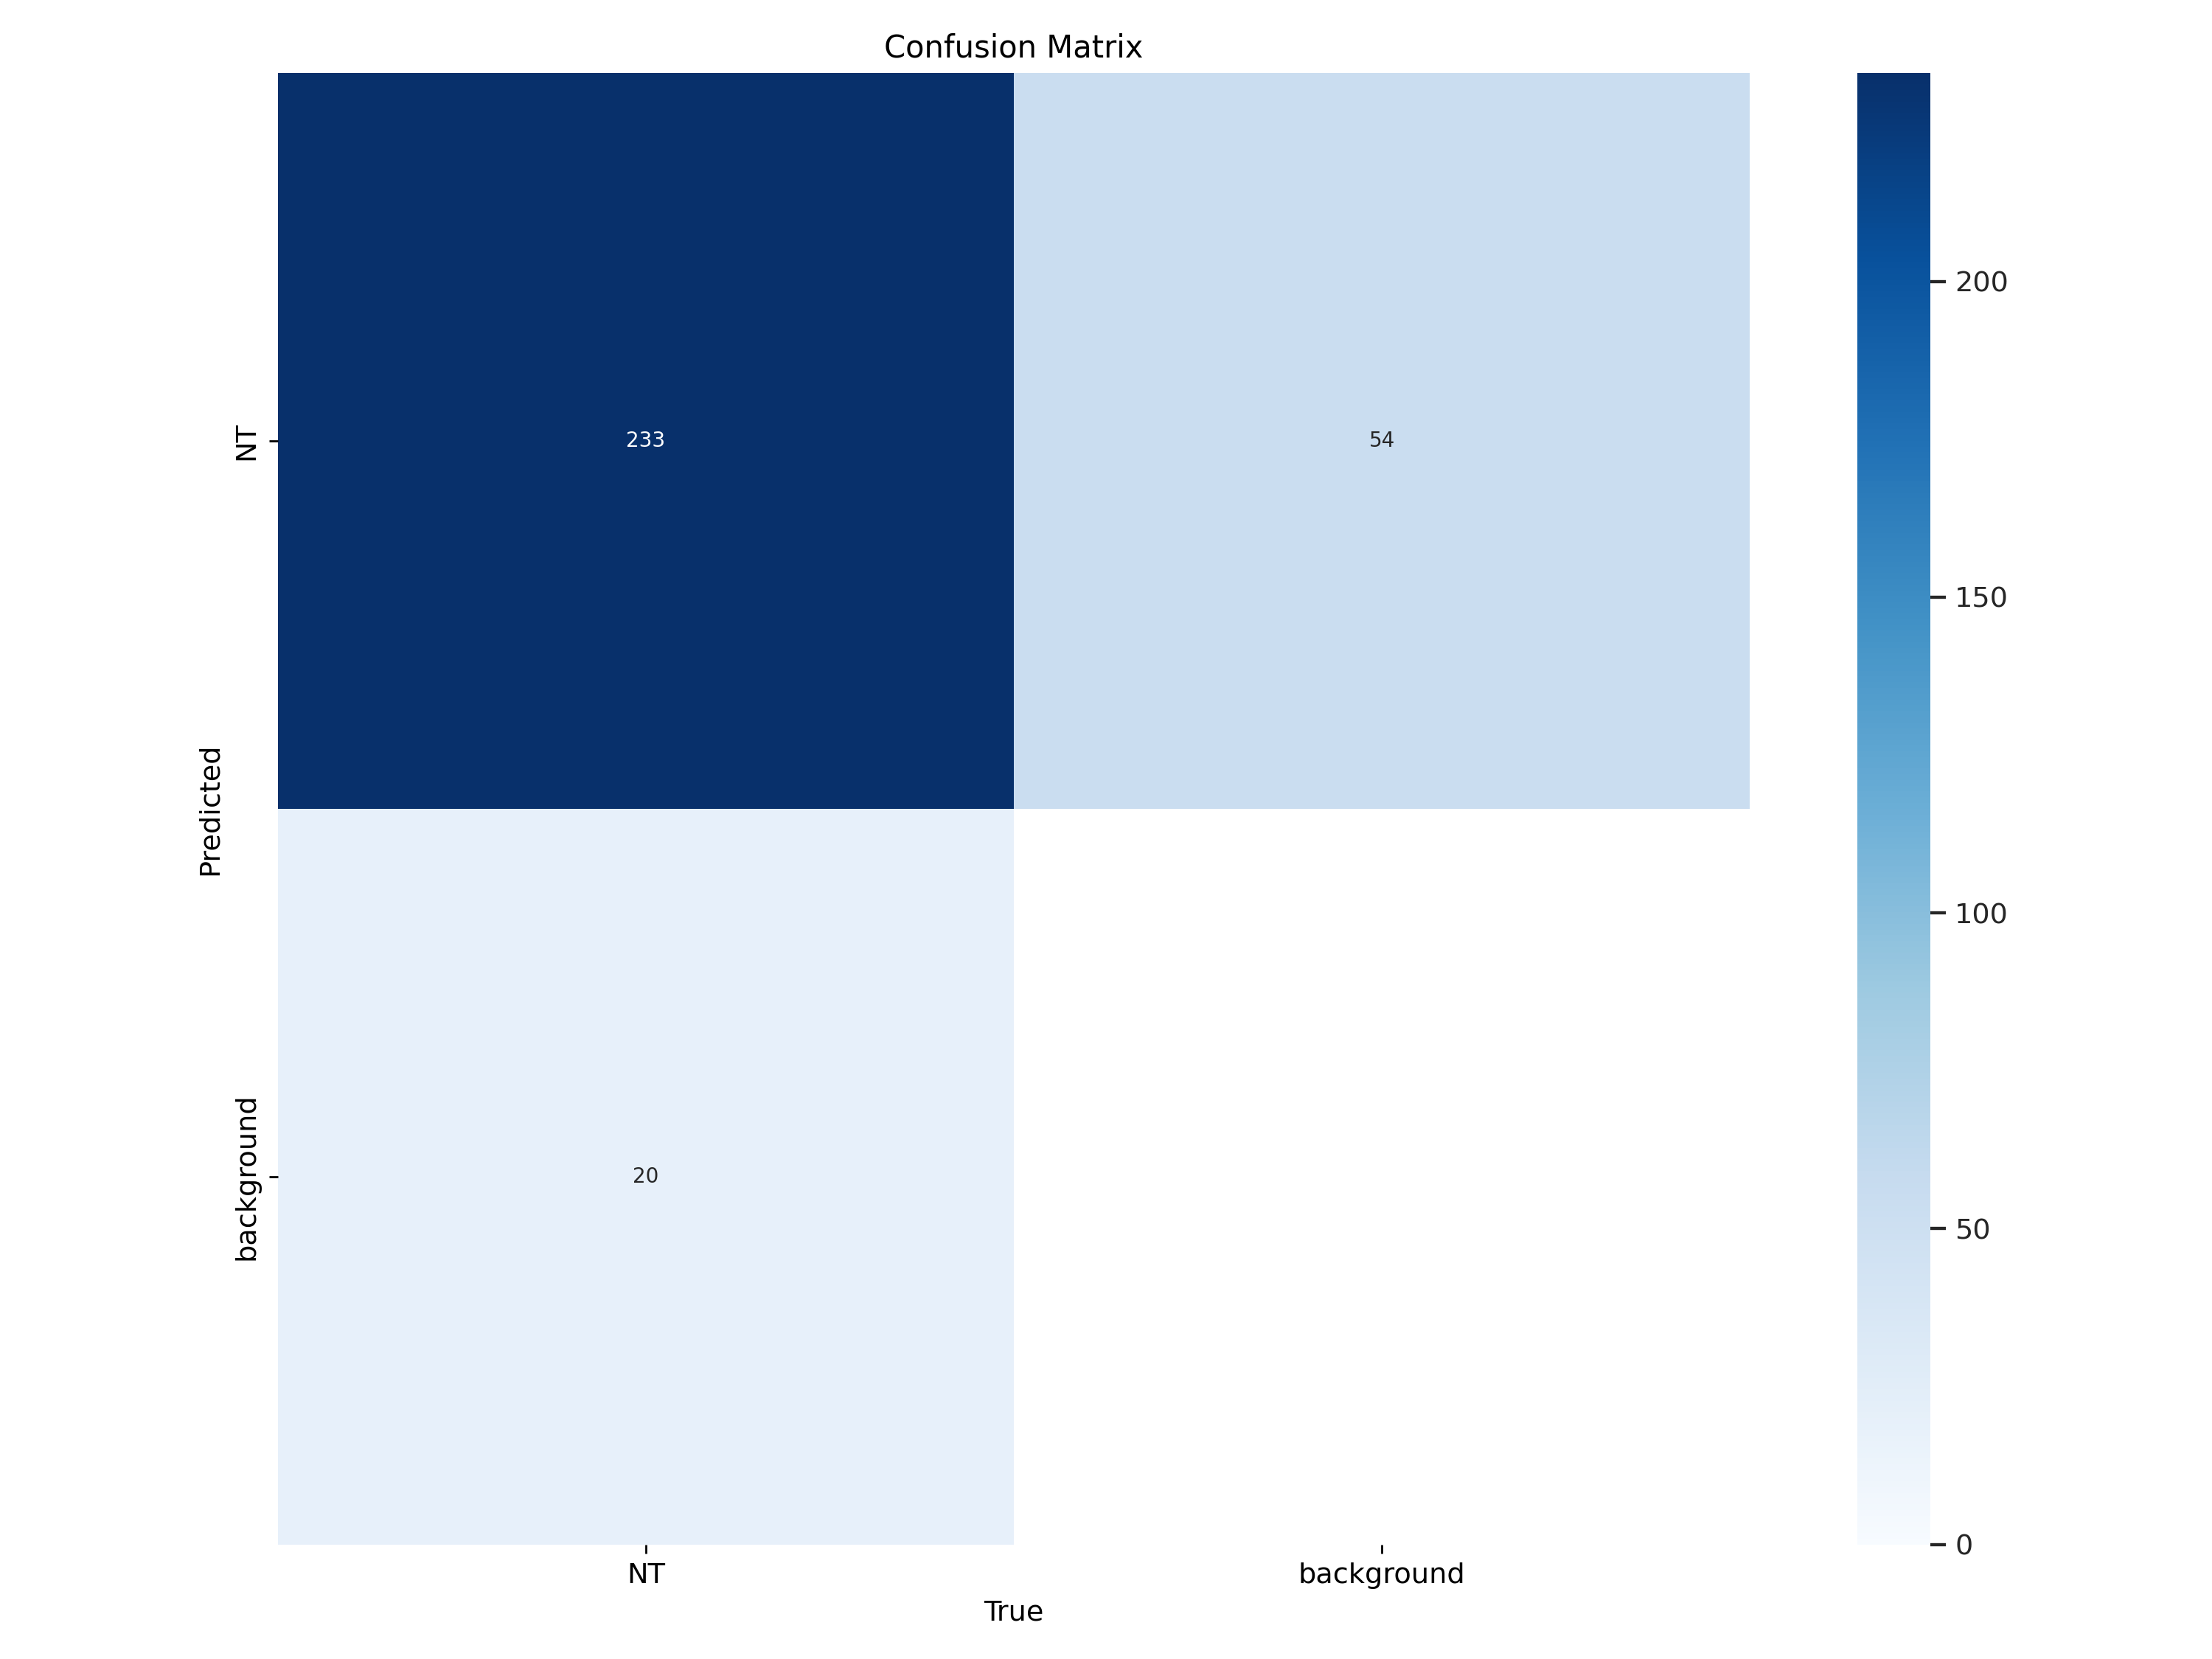

In [11]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs/train2/confusion_matrix.png'))

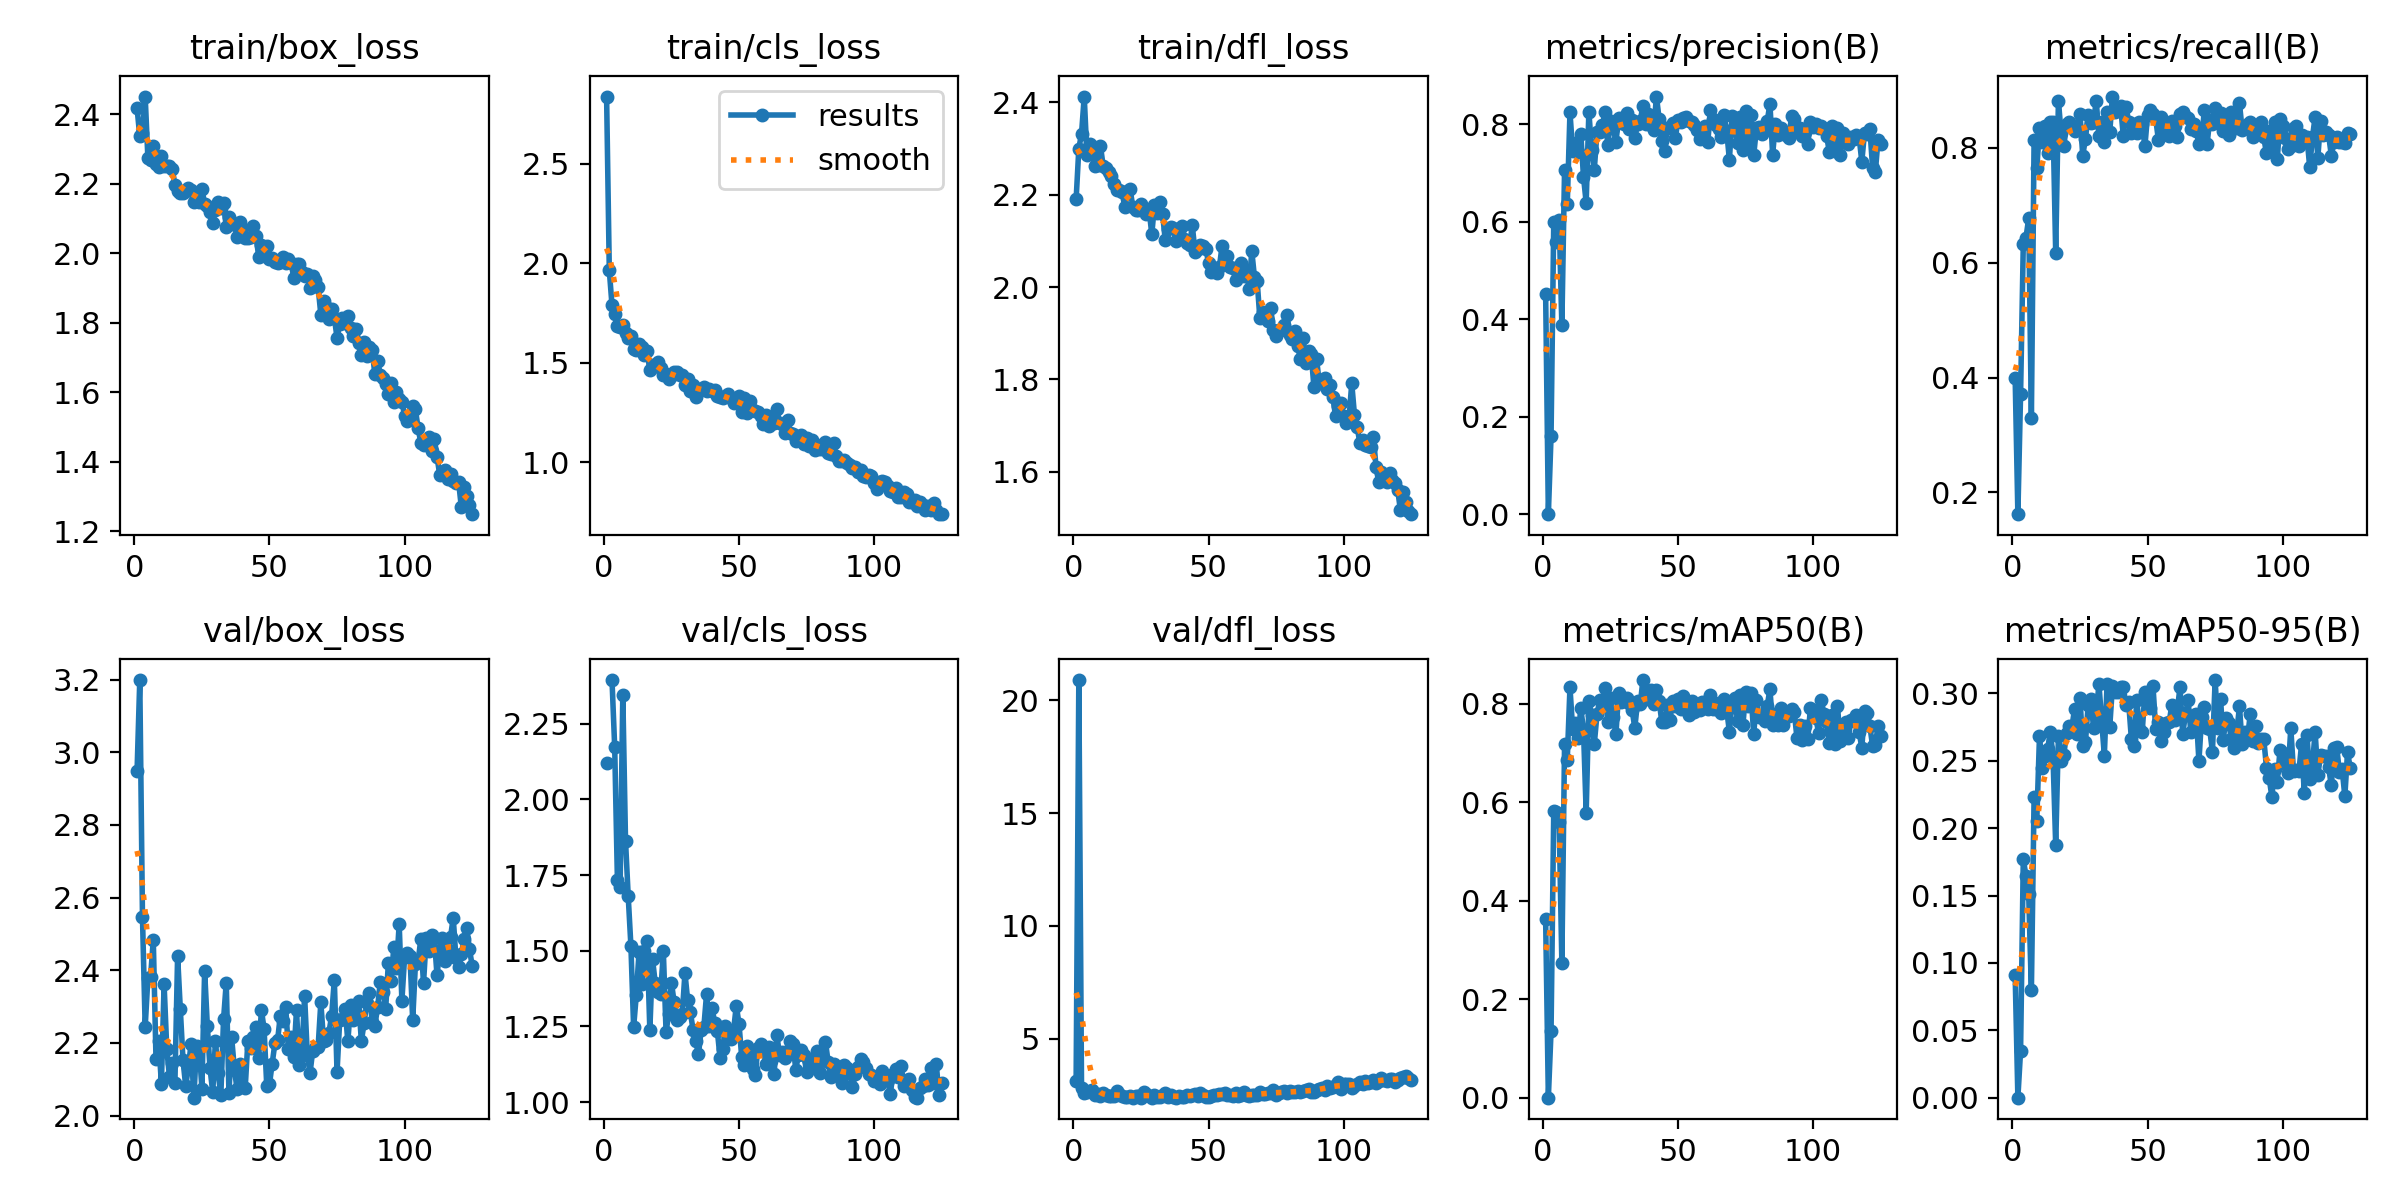

In [12]:
display(Image('/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs/train2/results.png'))

Visualize Training Data with Labels

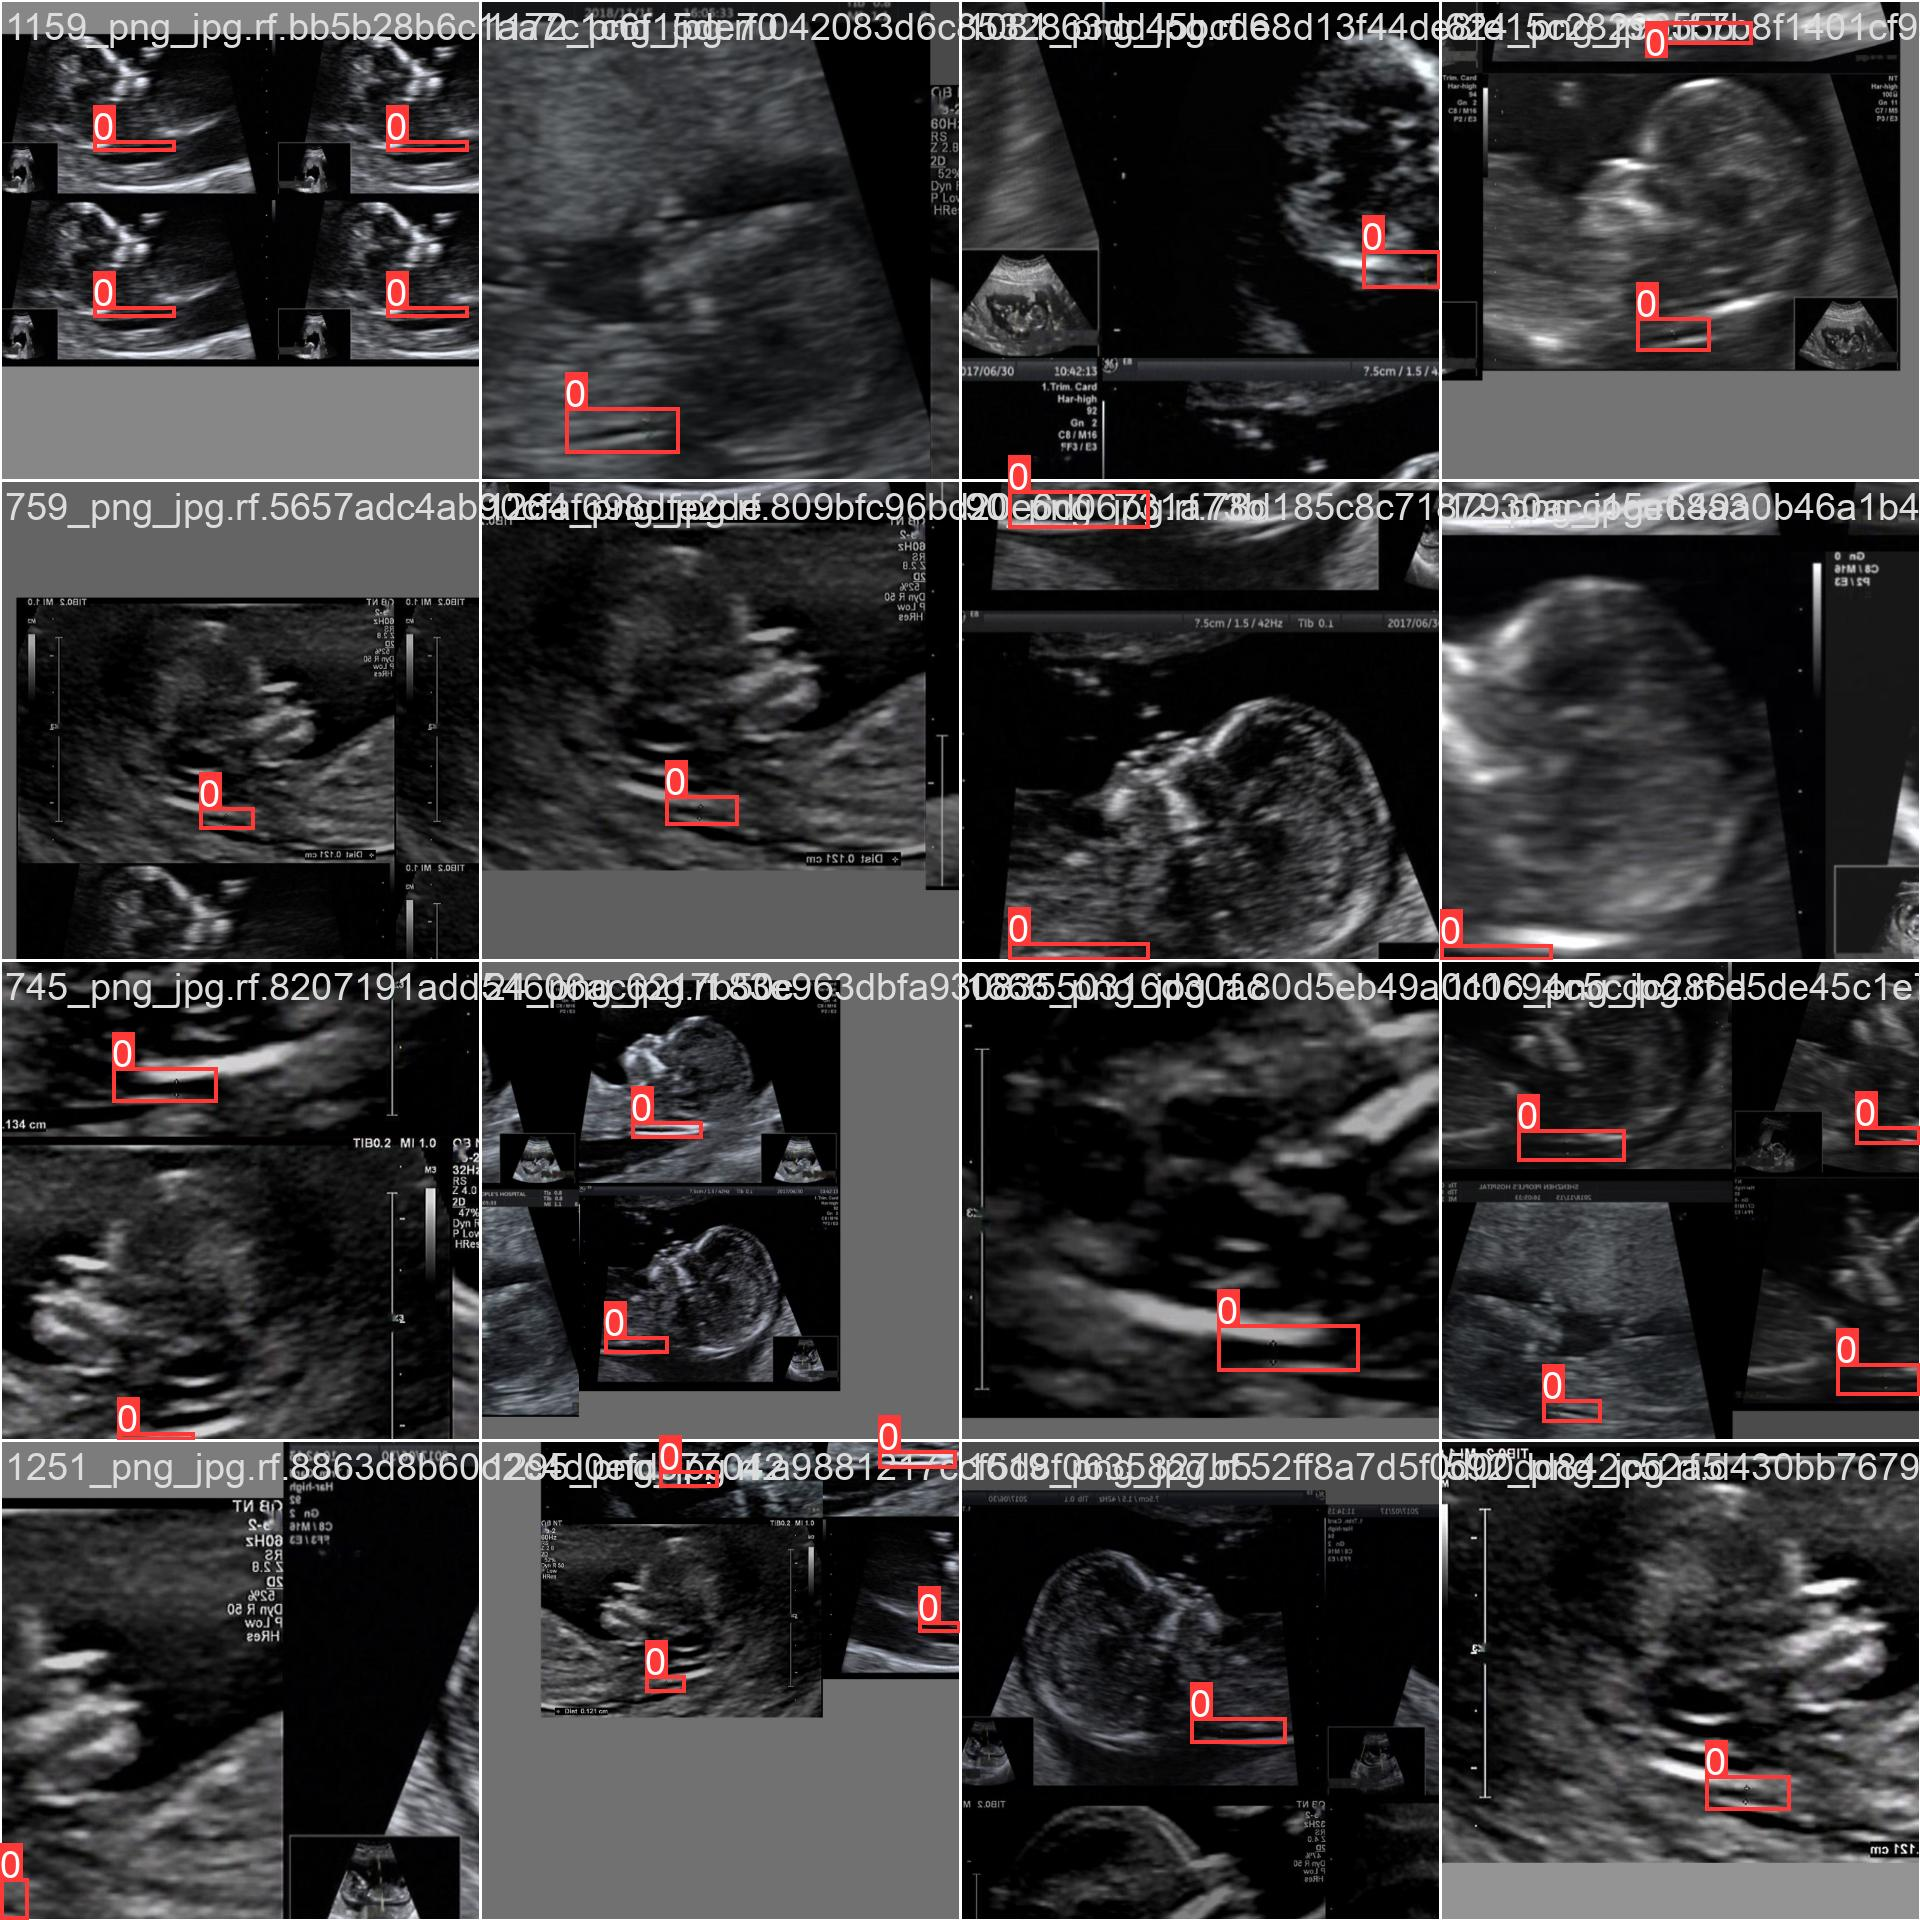

In [13]:
display(Image('/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs/train2/train_batch0.jpg'))

In [14]:
#!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt conf=0.5 data={dataset.location}/data.yaml
!yolo task=detect mode=val model="/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs/train2/weights/best.pt" data="$path/data.yaml" --project="$path/runs"

WARNING ⚠️ '--project=/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs' does not require leading dashes '--', updating to 'project=/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs'.
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/valid/labels.cache... 260 images, 8 backgrounds, 0 corrupt: 100% 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:08<00:00,  2.07it/s]
                   all        260        253      0.825      0.876      0.827      0.312
Speed: 1.1ms preprocess, 17.0ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to /content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [15]:
#!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 data={dataset.location}/data.yaml source=/content/ds_yolo-6/test/images
!yolo task=detect mode=predict model="/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs/train2/weights/best.pt" conf=0.5 data="$path/data.yaml" source="/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/test/images"  --project="$path/runs"

WARNING ⚠️ '--project=/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs' does not require leading dashes '--', updating to 'project=/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs'.
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/414 /content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/test/images/122_png_jpg.rf.ed7b89d20b75c0d32d179d7c83b24323.jpg: 480x640 (no detections), 110.1ms
image 2/414 /content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/test/images/123_png_jpg.rf.912dba763e6ecf5474a10f1e2100b196.jpg: 480x640 (no detections), 28.1ms
image 3/414 /content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/test/images/125_png_jpg.rf.31cfa99d4e2b331412993efa802aaa69.jpg: 480x640 (no detections), 28.0ms
image 4/414 /content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/test/images/127_png_jpg.rf.d3811028b74c7bbf0543322c3672cef8.jpg: 480x640 1 NT, 28.0ms
image

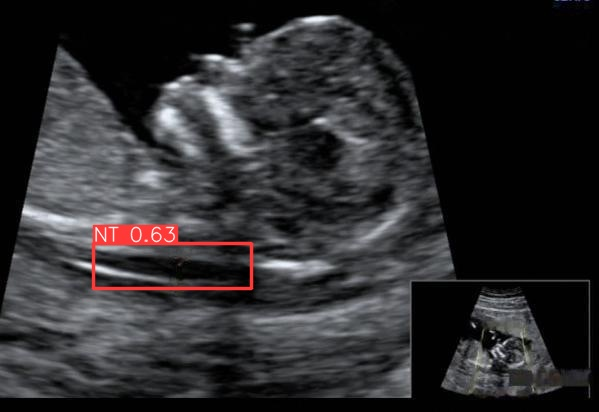

In [17]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/drive/MyDrive/Colab Notebooks/yolov8/ds-1/runs/predict/529_png_jpg.rf.486a740bf164db26fefc57c74d5f43c6.jpg'):
  display(Image(filename=image_path))
  print()

#Converting to Tar file
import tarfile
import os

local_folder_path = '/content/runs'
archive_path = '/content/runs.tar.gz'

with tarfile.open(archive_path, 'w:gz') as tar:
    tar.add(local_folder_path, arcname=os.path.basename(local_folder_path))